# Stock Analysis Report using Mulitple agents

### 1. **Executive Summary**
   - **Objective**: Evaluate AAPL stock for potential investment opportunities using a Multi-Agent Crew AI system.
   - **Investment Recommendation**: [Buy/Hold/Sell]
   - **Summary of Findings**: Brief overview of the key findings from the analysis.

### 2. **Market Overview**
   - **Industry Performance**: Overview of the industry in which the company operates, including market trends and forecasts.
   - **Economic Indicators**: Key economic indicators that might impact the industry and stock performance (e.g., GDP growth, interest rates, inflation).
   - **Competitive Landscape**: Analysis of the company’s competitors, including market share and performance metrics.

### 3. **Stock Performance Analysis**
   - **Historical Performance**:
     - Price trends over the past 1, 5, and 10 years.
     - Volatility and risk assessment.
   - **Technical Analysis**:
     - Moving Averages: 50-day, 200-day.
     - RSI (Relative Strength Index), MACD (Moving Average Convergence Divergence), and other technical indicators.
   - **Agent Insight**: Specialized AI agent's analysis focusing on technical aspects.

### 4. **Fundamental Analysis**
   - **Financial Health**:
     - Revenue, profit margins, earnings growth.
     - Debt levels, cash flow, and liquidity ratios.
   - **Valuation Metrics**:
     - P/E ratio, P/B ratio, and other valuation indicators.
   - **Dividends and Earnings Stability**: Analysis of the company's dividend history and earnings stability.
   - **Agent Insight**: AI agent’s analysis focused on the company’s financials and valuation.

### 5. **Sentiment Analysis**
   - **News Sentiment**: Evaluation of recent news articles and their tone concerning the company.
   - **Social Media Sentiment**: Analysis of social media trends and discussions surrounding the stock.
   - **Agent Insight**: AI agent’s analysis of sentiment trends and their potential impact on stock performance.

### 6. **Risk Assessment**
   - **Market Risk**: Potential risks related to market conditions and overall economic environment.
   - **Company-Specific Risk**: Risks related to the company, such as management changes, legal issues, or supply chain disruptions.
   - **Agent Insight**: AI agent’s assessment of risk factors and their implications.

### 7. **Future Outlook**
   - **Growth Projections**: AI-driven projections on the company’s future growth prospects.
   - **Earnings Forecast**: Projected earnings and revenue growth over the next 1 to 5 years.
   - **Strategic Initiatives**: Insights into the company’s strategic plans and their potential impact on stock performance.
   - **Agent Insight**: AI agent’s forecast based on future market conditions and company strategy.

### 8. **Investment Decision**
   - **Investment Horizon**: Short-term, medium-term, and long-term recommendations.
   - **Portfolio Fit**: How this stock fits into a broader investment strategy.
   - **Agent Consensus**: Final recommendation based on the collaborative analysis of all AI agents.

### 9. **Appendix**
   - **Detailed Charts and Graphs**: Visual representations of the data analyzed.
   - **Agent-Specific Reports**: Individual AI agent reports for deeper insights.

##Import Libraries

In [33]:
import yfinance as yf
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

##Define Agents

* Technical analysis agent: 50 days moving average
* Financial analysis agent: P/E ratio, P/B ratio
* Sentiment analysis agent: using TextBlob
* Forecasting agent: Predict the stock price for future days

In [38]:
# Define the base AI agent class
class AI_Agent:
    def __init__(self, name):
        self.name = name

    def execute(self):
        raise NotImplementedError("Subclasses should implement this method.")

# Define the Technical Analysis Agent
class TechnicalAnalysisAgent(AI_Agent):
    def __init__(self, ticker):
        super().__init__("Technical Analysis Agent")
        self.ticker = ticker
        self.data = yf.download(ticker, period="1y")

    def execute(self):
        result = {
            "50-Day Moving Average": self.moving_average(50),
            "RSI": self.rsi()
        }
        return result

    def moving_average(self, window):
        return self.data['Close'].rolling(window=window).mean().iloc[-1]

    def rsi(self, window=14):
        delta = self.data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window).mean()
        rs = gain / loss
        return 100 - (100 / (1 + rs)).iloc[-1]

# Define the Financial Analysis Agent
class FinancialAnalysisAgent(AI_Agent):
    def __init__(self, ticker):
        super().__init__("Fundamental Analysis Agent")
        self.ticker = ticker
        self.financials = yf.Ticker(ticker).financials
        self.balance_sheet = yf.Ticker(ticker).balance_sheet

    def execute(self):
        result = {
            "Financial Health": self.financial_health(),
            "Valuation Metrics": self.valuation_metrics()
        }
        return result

    def financial_health(self):
        return (self.financials.loc['Net Income'] / self.balance_sheet.loc['Total Assets']).iloc[-1]

    def valuation_metrics(self):
        info = yf.Ticker(self.ticker).info
        return {
            "P/E Ratio": info.get("trailingPE"),
            "P/B Ratio": info.get("priceToBook")
        }

# Define the Sentiment Analysis Agent
class SentimentAnalysisAgent(AI_Agent):
    def __init__(self, ticker, news_headlines):
        super().__init__("Sentiment Analysis Agent")
        self.ticker = ticker
        self.news_headlines = news_headlines

    def execute(self):
        sentiment_score = self.analyze_news_sentiment()
        return {"Sentiment Score": sentiment_score}

    def analyze_news_sentiment(self):
        sentiments = []
        for headline in self.news_headlines:
            blob = TextBlob(headline)
            sentiments.append(blob.sentiment.polarity) # add news feed analysis
        return np.mean(sentiments)

# Define the Forecasting Agent using a Neural Network
class ForecastingAgent(AI_Agent):
    def __init__(self, ticker):
        super().__init__("Forecasting Agent")
        self.ticker = ticker
        self.data = yf.download(ticker, period="5y")
        self.model = self.build_model()

    def build_model(self):
        model = Sequential()
        model.add(LSTM(units=50, return_sequences=True, input_shape=(60, 1)))
        model.add(Dropout(0.2))
        model.add(LSTM(units=50, return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dense(units=25))
        model.add(Dense(units=1))

        model.compile(optimizer='adam', loss='mean_squared_error')
        return model

    def prepare_data(self):
        data = self.data.filter(['Close'])
        dataset = data.values
        training_data_len = int(np.ceil(len(dataset) * .95))

        # Use MinMaxScaler from sklearn.preprocessing
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(dataset)
        scaled_data = scaler.fit_transform(dataset)

        train_data = scaled_data[0:int(training_data_len), :]

        x_train = []
        y_train = []

        for i in range(60, len(train_data)):
            x_train.append(train_data[i - 60:i, 0])
            y_train.append(train_data[i, 0])

        x_train, y_train = np.array(x_train), np.array(y_train)
        x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
        return x_train, y_train, scaler, training_data_len

    def execute(self):
        x_train, y_train, scaler, training_data_len = self.prepare_data()
        self.model.fit(x_train, y_train, batch_size=1, epochs=1)

        # Extract the test data from the original dataset
        test_data = self.data.filter(['Close']).values[training_data_len - 60:, :]

        # Scale the test data using the fitted scaler
        test_data = scaler.transform(test_data)

        x_test = []
        for i in range(60, len(test_data)):
            x_test.append(test_data[i - 60:i, 0])

        x_test = np.array(x_test)
        x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

        predictions = self.model.predict(x_test)
        predictions = scaler.inverse_transform(predictions)

        future_price = predictions[-1][0]
        return {"Future Price (30 Days)": future_price}


## Using agents

* Predict the future stock price
* Print the result

In [40]:
import pandas as pd

# Multi-Agent Crew AI System
class MultiAgentCrewAI:
    def __init__(self, agents):
        self.agents = agents

    def run_analysis(self):
        report = {}
        for agent in self.agents:
            agent_result = agent.execute()
            report.update(agent_result)
        return report

# usage
if __name__ == "__main__":
    ticker = "AAPL"  # stock ticker
    news_headlines = [
        "Apple's latest iPhone sales break records",
        "Apple faces supply chain challenges in China"
    ]

    # Instantiate agents
    technical_agent = TechnicalAnalysisAgent(ticker)
    financial_agent = FinancialAnalysisAgent(ticker)
    sentiment_agent = SentimentAnalysisAgent(ticker, news_headlines)
    forecasting_agent = ForecastingAgent(ticker)

    # Create the crew AI system
    crew_ai = MultiAgentCrewAI([technical_agent, financial_agent, sentiment_agent, forecasting_agent])

    # Run the analysis
    report = crew_ai.run_analysis()

    # Convert the report to a DataFrame for better visualization
    report_df = pd.DataFrame(report.items(), columns=["Metric", "Value"])
    print(report_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1136/1136 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - loss: 0.0066
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 429ms/step
                   Metric                                            Value
0   50-Day Moving Average                                       218.846601
1                     RSI                                        55.914541
2        Financial Health                                         0.275098
3       Valuation Metrics  {'P/E Ratio': 34.476406, 'P/B Ratio': 51.69101}
4         Sentiment Score                                             0.25
5  Future Price (30 Days)                                       215.403244


## Create a plot diagram

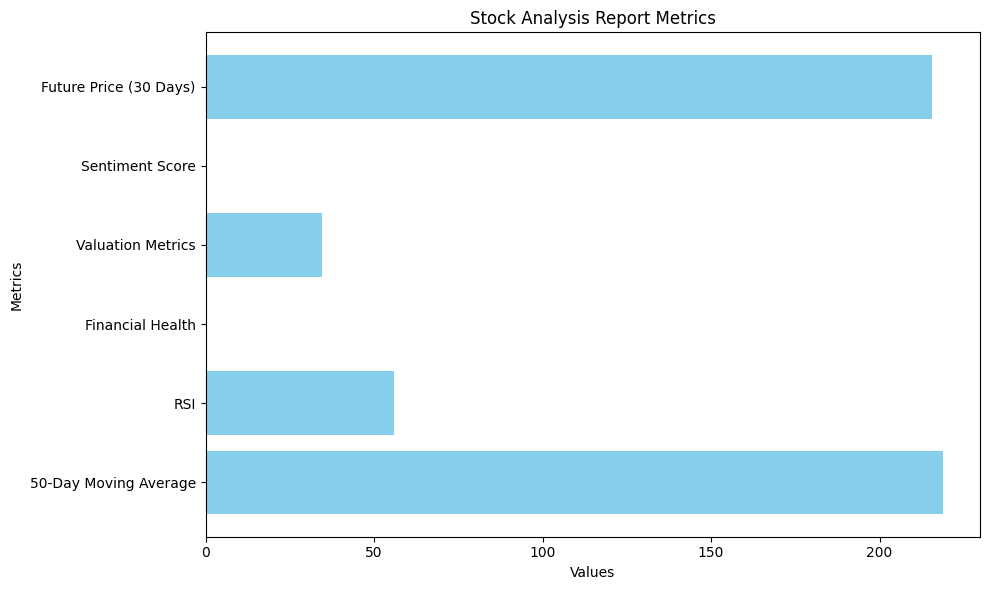

In [41]:
import matplotlib.pyplot as plt

# Sample data from the multi-agent system report (for demonstration purposes)
report_data = {
    "50-Day Moving Average": report_df.loc[report_df['Metric'] == '50-Day Moving Average', 'Value'].values[0],
    "RSI": report_df.loc[report_df['Metric'] == 'RSI', 'Value'].values[0],
    "Financial Health": report_df.loc[report_df['Metric'] == 'Financial Health', 'Value'].values[0],
    "Valuation Metrics": report_df.loc[report_df['Metric'] == 'Valuation Metrics', 'Value'].values[0],
    "Sentiment Score": report_df.loc[report_df['Metric'] == 'Sentiment Score', 'Value'].values[0],
    "Future Price (30 Days)": report_df.loc[report_df['Metric'] == 'Future Price (30 Days)', 'Value'].values[0]
}

# Create a bar plot to visualize the report data
metrics = list(report_data.keys())
values = []
#report_data
for value in report_data.values():
    if isinstance(value, dict):
        # Assuming you want a single representative value from the dictionary
        values.append(list(value.values())[0])  # Take the first value
    else:
        values.append(value)
# values
plt.figure(figsize=(10, 6))
plt.barh(metrics, values, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Metrics')
plt.title('Stock Analysis Report Metrics')
plt.tight_layout()

# Display the plot
plt.show()

## Showing the trends

[*********************100%%**********************]  1 of 1 completed


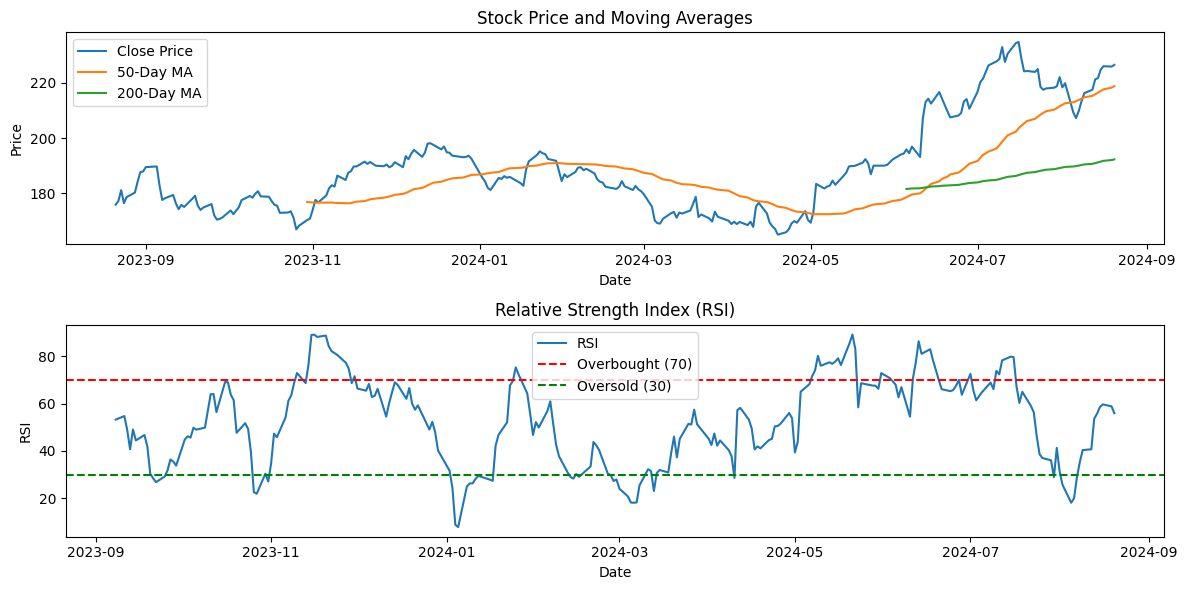

In [43]:
# show the moving average trend and rsi trend visually

import matplotlib.pyplot as plt

# Calculate moving averages
data = yf.download(ticker, period="1y")
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Calculate RSI
delta = data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Plotting
plt.figure(figsize=(12, 6))

# Price and Moving Averages
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA50'], label='50-Day MA')
plt.plot(data['MA200'], label='200-Day MA')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# RSI
plt.subplot(2, 1, 2)
plt.plot(data['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

plt.tight_layout()
plt.show()
